In [195]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

In [196]:
data = pd.read_csv("auto-mpg.csv", na_values = "?")

In [197]:
data = data.dropna()

In [198]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


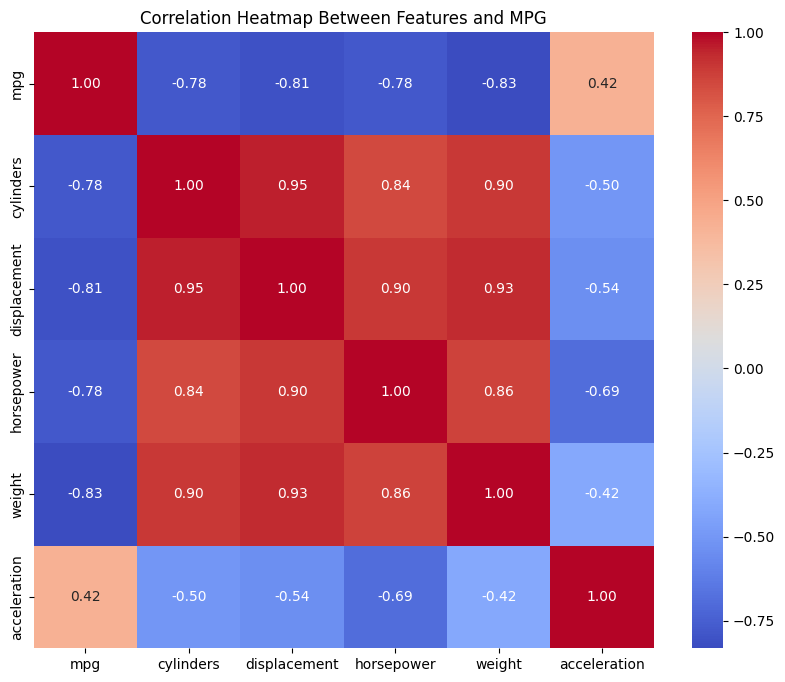

In [199]:
# Feature selection: Correlation matrix to visualize relationships
plt.figure(figsize=(10, 8))
corr_matrix = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Features and MPG")
plt.show()

In [200]:
# # Features: weight, horsepower, displacement
# X = data[['weight', 'horsepower', 'displacement','cylinders']]
# #X = data[['weight']]
# y = data['mpg']

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

# # Print the learned weights and bias
# print("Learned weights (coefficients):", model.coef_)
# print("Learned bias (intercept):", model.intercept_)


In [201]:
# Features: weight, horsepower, displacement
X = data[['weight', 'horsepower', 'displacement','cylinders']].values.astype(np.float64)
#X = data[['weight', 'horsepower',]].values.astype(np.float64)
y = data['mpg'].values.astype(np.float64)

# Normalize the data using TensorFlow
X_mean = tf.reduce_mean(X, axis=0)
X_std = tf.math.reduce_std(X, axis=0)
X = (X - X_mean) / X_std  # Normalize the features

# Split the data into training and test sets manually (80% training, 20% testing)
n_samples = X.shape[0]
train_size = int(0.8 * n_samples)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert data to TensorFlow tensors
X_train = tf.constant(X_train, dtype=tf.float64)
X_test = tf.constant(X_test, dtype=tf.float64)
y_train = tf.constant(y_train, dtype=tf.float64)
y_test = tf.constant(y_test, dtype=tf.float64)

# Build the Sequential model with a single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X_train.shape[1], activation='linear')  # Single neuron, linear activation
])

# Compile the model with plain gradient descent (batch mode)
# We specify batch_size equal to the entire training set to simulate plain gradient descent
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model with batch_size = number of samples (full batch gradient descent)
history = model.fit(X_train, y_train, epochs=500, batch_size=X_train.shape[0], verbose=1)

# Compile the model with SGD (Stochastic Gradient Descent)
# history = model.fit(X_train, y_train, epochs=100, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (Mean Squared Error)
# mse = tf.reduce_mean(tf.square(y_test - tf.squeeze(y_pred)))
# print(f"Mean Squared Error: {mse.numpy()}")

# Print the learned weights and bias
weights, bias = model.layers[0].get_weights()
print("Learned weights (coefficients):", weights.flatten())
print("Learned bias (intercept):", bias)

Epoch 1/500
1/1 [==============================] - 0s 111ms/step - loss: 495.8371
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 477.2199
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 459.3216
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 442.1139
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 425.5695
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 409.6626
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 394.3682
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 379.6623
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 365.5220
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 351.9255
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 338.8516
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 326.2801
Epoch 13/500
1/1 [=================

In [202]:
# # Create a DataFrame to compare actual and predicted values
# results = pd.DataFrame({'Actual MPG': y_test, 'Predicted MPG': y_pred})
# print(results.head())

# # Visualization 1: Actual vs. Predicted MPG
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='blue')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
# plt.title('Actual vs. Predicted MPG')
# plt.xlabel('Actual MPG')
# plt.ylabel('Predicted MPG')
# plt.show()

# # Visualization 2: Residual Plot (Actual - Predicted)
# residuals = y_test - y_pred
# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred, residuals, color='purple')
# plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linewidth=2)
# plt.title('Residual Plot')
# plt.xlabel('Predicted MPG')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.show()

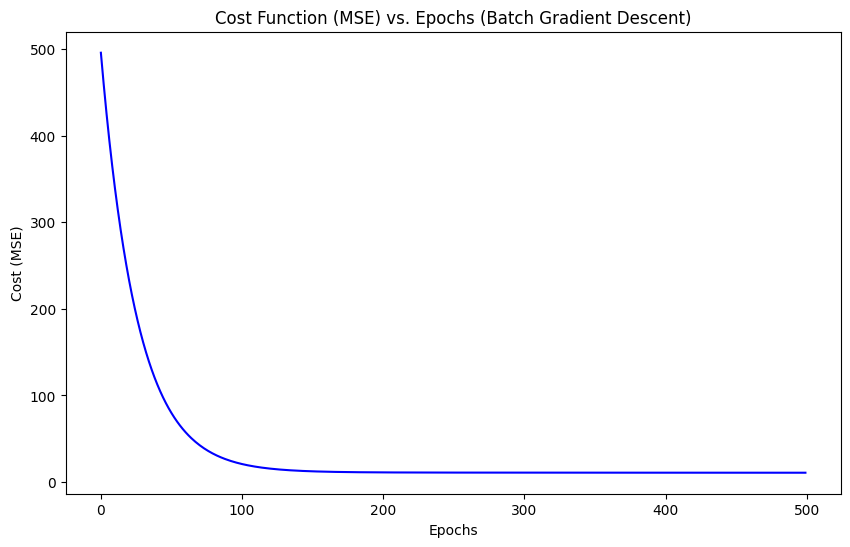

In [203]:
# Plot the loss function (MSE) over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='blue')
plt.title('Cost Function (MSE) vs. Epochs (Batch Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.show()

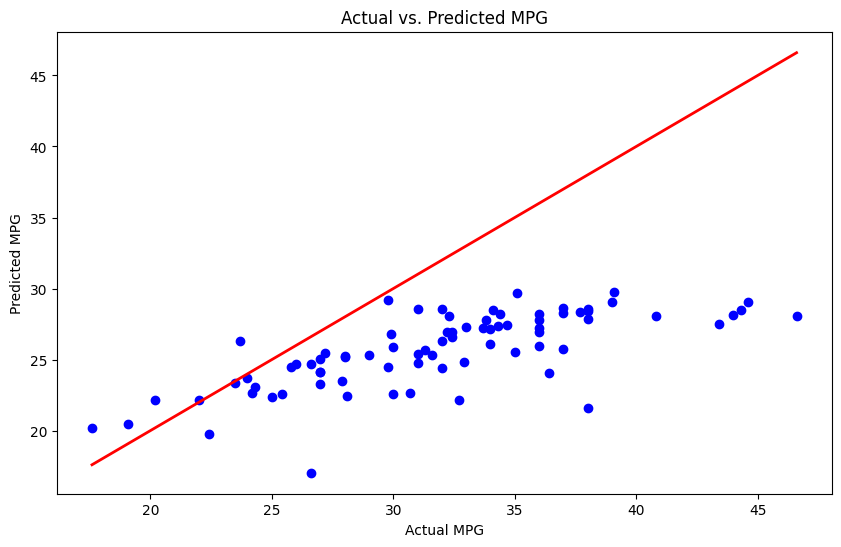

In [204]:
# Visualization: Actual vs. Predicted MPG
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

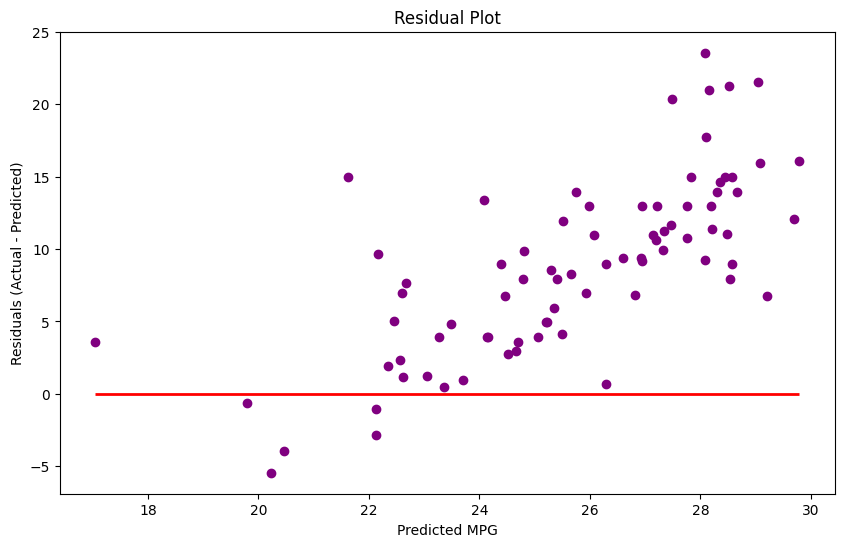

In [205]:
# Visualization 2: Residual Plot (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals[0], color='purple')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()